<a href="https://colab.research.google.com/github/LakshitaAgg15/MachineLearning/blob/main/Ridge_and_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
# reading the file and viewing its structure

data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking for null values

data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Creating dummy variables for the categorical columns
gender = pd.get_dummies(data['sex'], drop_first=True)
issmoker=pd.get_dummies(data['smoker'],drop_first=True)

# Concatenate these new columns to the original DataFrame
data=pd.concat([data,gender],axis=1)

# Optionally, drop the original categorical columns
data.drop(["sex","smoker","region"],axis=1,inplace=True)

In [6]:
X=data.drop('charges',axis=1)
y=data['charges']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for regularization methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
LinReg=LinearRegression()

In [9]:
LinReg.fit(X_train_scaled,y_train)

LinearRegression()

In [26]:
linpred=LinReg.predict(X_test_scaled)
linpred

array([12626.42633778, 11128.81816354, 16289.67626805, 14923.14402712,
        9328.21313863, 16828.28114587,  4887.33966972, 21264.07147184,
        5152.97784939, 16559.94923924, 10937.95048049, 14863.97043622,
        9990.85418556, 20408.67245304, 21374.87197933, 18950.25173837,
       19294.49022655, 16300.02227446, 13244.28060997, 11642.28781093,
       10772.68788029, 15970.59043168,  8826.0750352 , 11263.07323293,
       15259.05770875, 15991.03566492, 18118.31765568, 10922.26798228,
       13539.78923423,  8518.87877895, 13989.05105886, 16372.49561848,
        9411.47195463,  8133.98115796, 10796.2806491 , 17686.96406849,
        7166.59117845, 13191.52290176, 13277.11814302, 14727.16365169,
        9663.63252531, 10357.04172094, 18017.56635186, 16046.29468882,
       14798.16345779, 17273.43461462, 10108.26844424,  8464.50006378,
       17637.10119798, 15227.68963399, 19178.65511091,  8817.72392144,
       16333.28852257,  7192.50740707, 18345.65757033, 17357.84644984,
      

In [11]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(LinReg,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(mse)

np.float64(-128912357.17889097)

In [12]:
r2_score=r2_score(y_test,pred)
r2_score

0.1573520450972109

In [13]:
Ridge=Ridge()
Ridge.fit(X_train_scaled,y_train)

Ridge()

In [14]:
from sklearn.model_selection import GridSearchCV

parameter={'alpha':[1,2,5,10,20,50,100]}
ridgecv=GridSearchCV(Ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train_scaled,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [15]:
ridgecv.best_params_

{'alpha': 20}

In [16]:
ridgecv.best_score_

np.float64(-128902349.95347452)

In [17]:
y_pred_ridge = ridgecv.predict(X_test_scaled)
y_pred_ridge

array([12637.80291335, 11164.87342629, 16235.65222643, 14896.25051088,
        9394.83377869, 16775.64047255,  5025.2902836 , 21130.61458293,
        5283.13379555, 16506.94327934, 10978.26712732, 14839.15138926,
       10048.03024217, 20298.46734906, 21241.40354155, 18860.86534666,
       19202.92419378, 16253.85713358, 13244.94242422, 11667.6200781 ,
       10819.43005491, 15928.1289502 ,  8900.32190913, 11302.93882103,
       15229.27536646, 15945.72532516, 18038.19231776, 10967.96034168,
       13536.45847185,  8598.2090121 , 13983.64833877, 16320.13841972,
        9479.87658834,  8220.76725965, 10838.59359325, 17615.77295234,
        7270.00326643, 13194.23940217, 13274.77438195, 14705.59812992,
        9733.6094649 , 10407.69685265, 17941.55568943, 15994.17194892,
       14777.68632854, 17203.58793561, 10167.91701826,  8548.35544752,
       17570.24282275, 15201.52468435, 19081.17244649,  8893.42871361,
       16289.54281343,  7291.98193559, 18259.86663165, 17291.39132239,
      

In [18]:
lasso=Lasso()

In [19]:
parameter={'alpha':[1,2,5,10,20,50,100]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [20]:
lassocv.best_params_

{'alpha': 1}

In [21]:
lassocv.best_score_

np.float64(-128912381.20958443)

In [22]:
y_pred_lasso = lassocv.predict(X_test_scaled)
y_pred_lasso

array([12627.19505955, 11130.95402144, 16290.59327005, 14921.04273652,
        9329.13385638, 16825.91347683,  4891.60165521, 21261.40927341,
        5157.46938403, 16557.23399366, 10937.0077588 , 14862.22582758,
        9992.70322473, 20404.12480177, 21372.00569436, 18946.91679597,
       19292.43988996, 16299.75366707, 13245.33609199, 11644.46535687,
       10770.57825036, 15968.42964448,  8827.21968961, 11264.60786122,
       15258.32207317, 15991.69916744, 18118.26447205, 10922.57703746,
       13540.22796358,  8520.12176422, 13987.97148618, 16373.10500766,
        9413.79366633,  8135.64969996, 10796.29370234, 17685.16244137,
        7169.39039716, 13192.485907  , 13278.39099049, 14725.81034681,
        9663.14627474, 10357.09598667, 18016.87979255, 16045.76610129,
       14796.13885035, 17271.83512996, 10109.23213999,  8465.82786393,
       17633.67356907, 15225.39613574, 19178.24505747,  8818.30999775,
       16332.73440137,  7194.34190924, 18343.98753957, 17355.33767143,
      

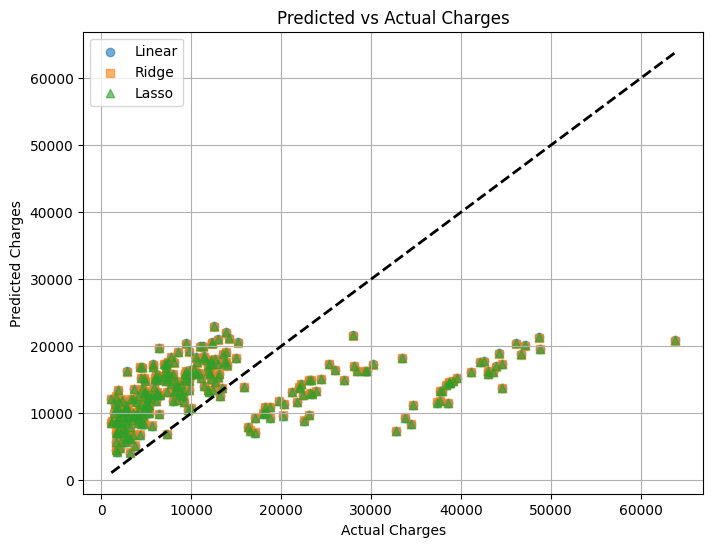

In [31]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, linpred, label='Linear', alpha=0.6, marker='o')
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.6, marker='s')
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.6, marker='^')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()


All three models are predicting very similar values, so their points are overlapping on the same spots in the scatterplot. That's why there are mostly green points(Lasso), even though Linear and Ridge are plotted too.

**Interpretation**

If Linear, Ridge, and Lasso give nearly equal performance, then:

The dataset is clean and not suffering from high multicollinearity or overfitting

Regularization isn’t needed much
